In [1]:
options(warn=-1)

library(dplyr)
library(tidyr)
library(xts)
library(dygraphs)
library(DT)
library(ggplot2)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Attaching package: ‘xts’

The following objects are masked from ‘package:dplyr’:

    first, last



# Load Data

In [10]:
data <- data.table::fread("prep_data.csv")

# Summary

In [3]:
summ.global <- global <- data %>%
  group_by(test, category="Global") %>%
  summarise(ctr = round(100 * sum(clicks) / sum(views), 2)
            , views = round(sum(visits),0)
            , clicks = round(sum(clicks), 0))

summ.categories <- global <- data %>%
  group_by(test, category) %>%
  summarise(ctr = round(100 * sum(clicks) / sum(views), 2)
            , views = round(sum(views), 0)
            , clicks = round(sum(clicks), 0))

summ <- bind_rows(summ.global, summ.categories)

summ %>%
  gather(measure, value, ctr, views, clicks) %>%
  spread(test, value) %>% DT::datatable()

HTML widgets cannot be represented in plain text (need html)

# Distribution

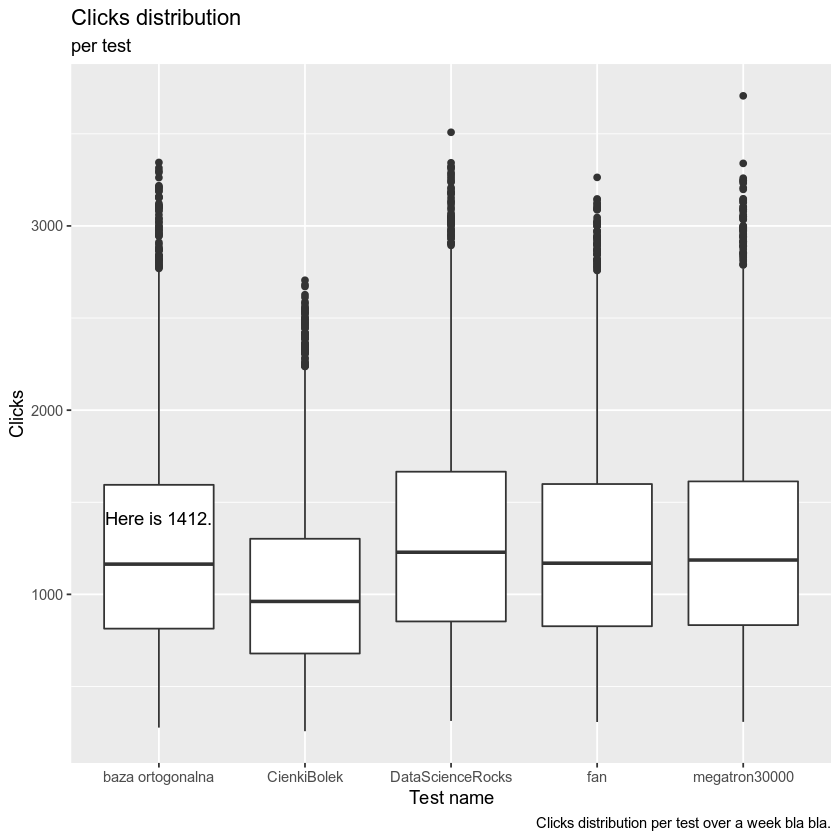

In [24]:
# The distribution doesn't really make sense
data %>% ggplot(aes(x=test, y=clicks, )) +
    geom_boxplot() + 
    labs(x = "Test name"
        , y = "Clicks"
        , title = "Clicks distribution"
        , subtitle = "per test"
        , caption = "Clicks distribution per test over a week bla bla.") +
    annotate(geom="text", x="baza ortogonalna", y=1412, label="Here is 1412.")

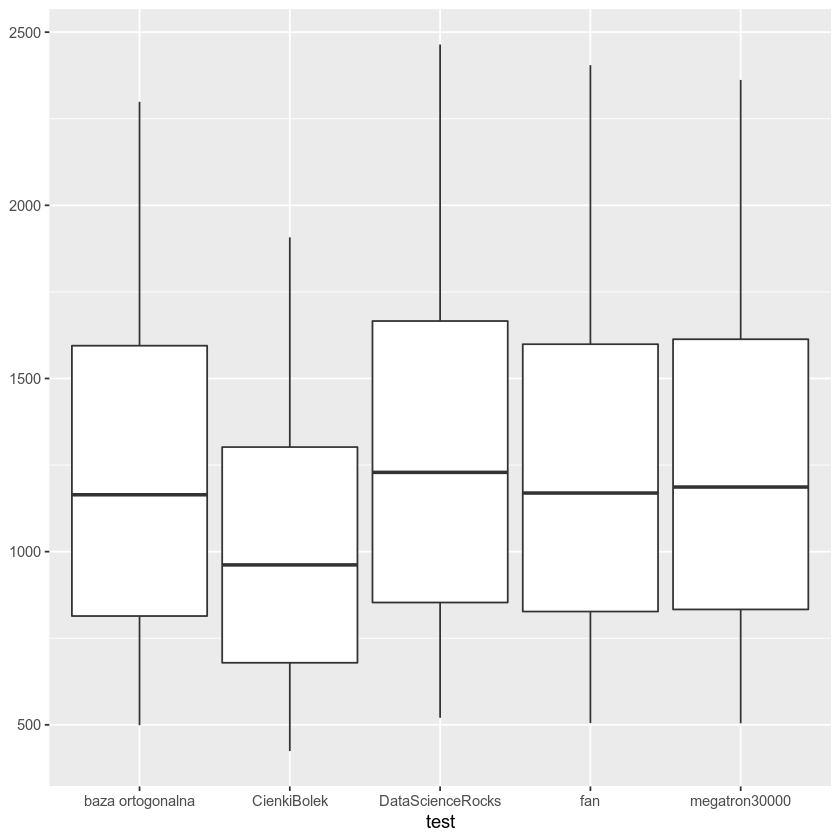

In [21]:
# Custom boxplot
data %>%
    group_by(test) %>%
    summarise(p05 = quantile(clicks, p=0.05)
             , p25 = quantile(clicks, p=0.25)
             , p50 = quantile(clicks, p=0.50)
             , p75 = quantile(clicks, p=0.75)
             , p95 = quantile(clicks, p=0.95)) %>%
    ggplot(aes(x=test)) +
        geom_boxplot(aes(
                        ymin = p05
                        , lower = p25
                        , middle = p50
                        , upper = p75
                        , ymax = p95
                        ), stat="identity")

# Graphs

In [6]:
graph.sys_bro <- data %>%
  mutate(system_browser = paste0(system, '_', browser)
         , date = as.POSIXct(date, format="%Y-%m-%d")) %>%
  filter(!grepl("Inn", system_browser)) %>%
  group_by(system_browser, date) %>%
  summarise(ctr = round(100 * sum(clicks) / sum(visits), 4))
graph.sys_bro.dygraph <- graph.sys_bro %>%
  spread(system_browser, ctr) %>%
  as.data.frame

rownames(graph.sys_bro.dygraph) <- graph.sys_bro.dygraph$date
graph.sys_bro.dygraph$date <- NULL
graph.sys_bro.dygraph %>% as.xts %>% dygraph() # %>% htmlwidgets::saveWidget(., "dygr.html")
# IRdisplay::display_html('<iframe src="dygr.html" width=100% height=450></iframe>')
# in jupyterlab dygraph() just works :)


HTML widgets cannot be represented in plain text (need html)

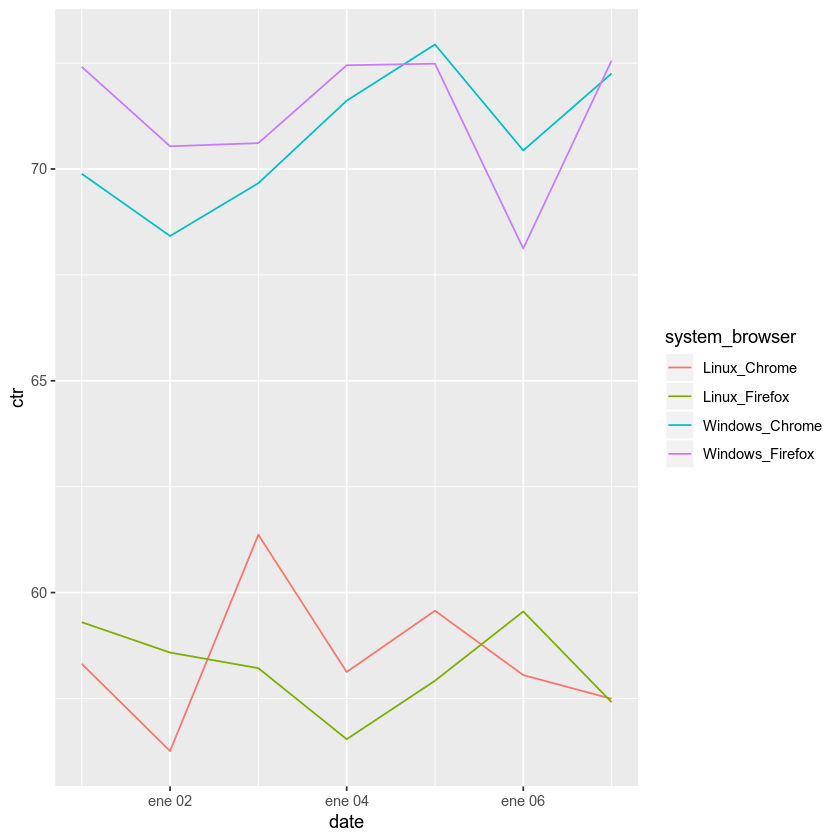

In [9]:
graph.sys_bro %>% ggplot(aes(x=date, y=ctr, color=system_browser)) +
    geom_line()